# 1 Realce local de histograma

In [ ]:
print("*********************************************************************"); 
print('****        Código criado pelo Prof. Dr. Thiago Statella         ****'); 
print('****        Disciplina: Processamento Digital de Imagens         ****'); 
print('****  Instituto Federal de Educação, Ciência e Tecnologia de MT  ****'); 
print('*********************************************************************'); 
print(' '); 
print(' '); 

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # as imagens são lidas como numpy arrays
from matplotlib import pyplot as plt # é preciso chamar os submódulos
from skimage import io,img_as_float, img_as_ubyte, img_as_uint
from skimage.exposure import histogram
import datetime as dt
import math

In [ ]:
print("*********************************************************************");
print('****        Código criado pelo Prof. Dr. Thiago Statella         ****');
print('****        Disciplina: Processamento Digital de Imagens         ****');
print('****  Instituto Federal de Educação, Ciência e Tecnologia de MT  ****');
print('*********************************************************************');

In [2]:
def data_info(img):
    print(f"Classe: {type(img)}")
    print(f"Tipo de variável: {img.dtype}")
    print(f"Min, max: {img.min(),img.max()}")
    print(f"Dimensões: {img.shape}")

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (0, 231)
Dimensões: (298, 252)


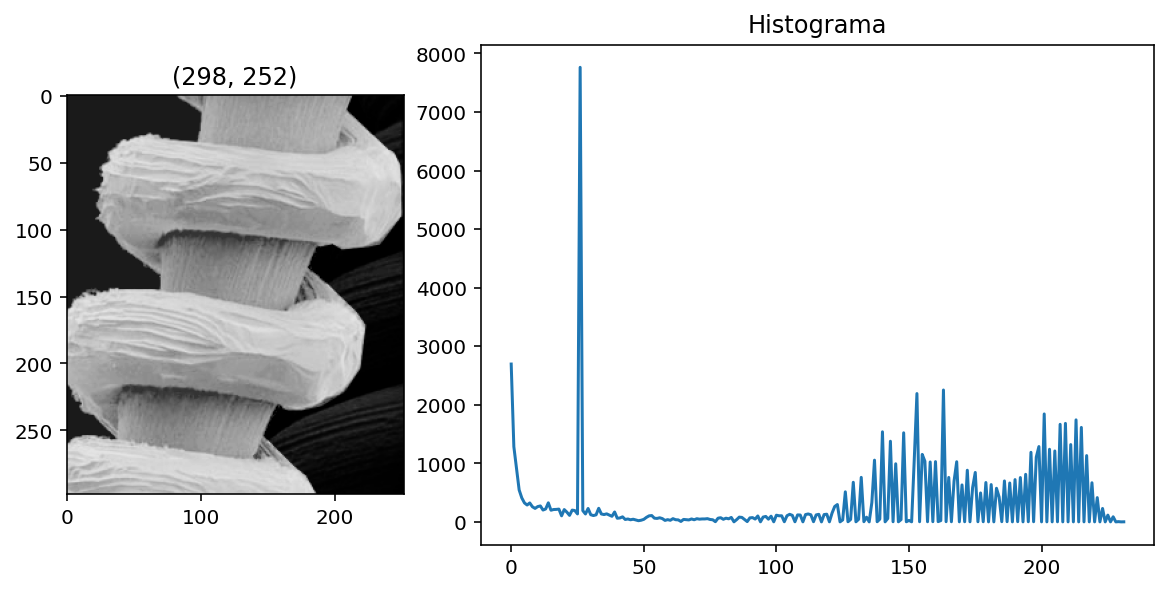

In [7]:
Get = io.imread('tungstenio.tif')
data_info(Get)

hist, hist_centers = histogram(Get)# histograma da imagem. hist_centers são os centros dos bins.
#Para imagens do tioi int, cada tom de cinza é seu próprio bin.

fig, ax = plt.subplots(ncols=2, figsize=(8, 4),
                        gridspec_kw={'width_ratios':[1,2]},
                        constrained_layout=True); 
ax[0].imshow(Get, vmin=0, vmax=255, cmap='gray')
ax[0].set_title(Get.shape); 
#ax[0].axis('off')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histograma'); 

In [64]:
Get = Get.astype(float)
Out = Get.copy()
k0 = 0.4
k1 = 0.02
k2 = 0.4
E  = 4.0

mG   = Get.mean()
stdG = Get.std()
m = Get.shape[0]
n = Get.shape[1]

cont = 0.0
for i in np.arange(1,m-2):
    for j in np.arange(1,n-2):
        Viz = np.array([Get[i-1:i+2,j-1:j+2]])
        mL   = Viz.mean()
        stdL = Viz.std()
        if mL <= (k0 * mG) and ((k1 * stdG) <= stdL <= (k2 * stdG)):
              Out[i,j] = E * Get[i,j]
              cont = cont +  1
    

In [65]:
print(cont)

6956.0


Classe: <class 'numpy.ndarray'>
Tipo de variável: float64
Min, max: (0.0, 304.0)
Dimensões: (298, 252)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


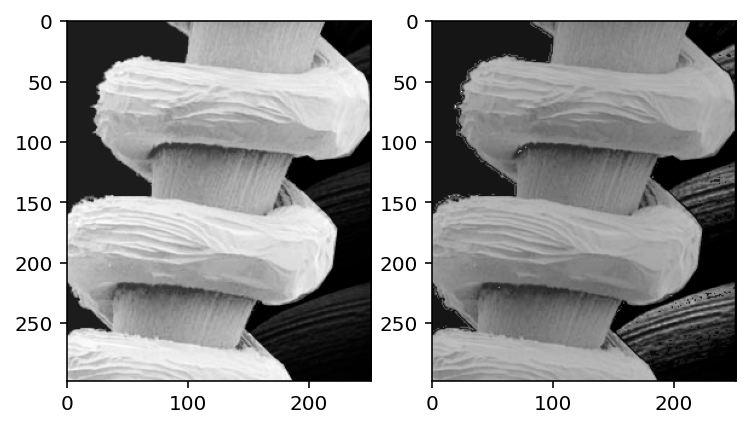

In [66]:
data_info(Out)
#Out = Out.astype(int)

fig, ax = plt.subplots(1,2)
ax[0].imshow(Get,cmap='gray')
ax[1].imshow(Out,cmap='gray')
print(Viz)

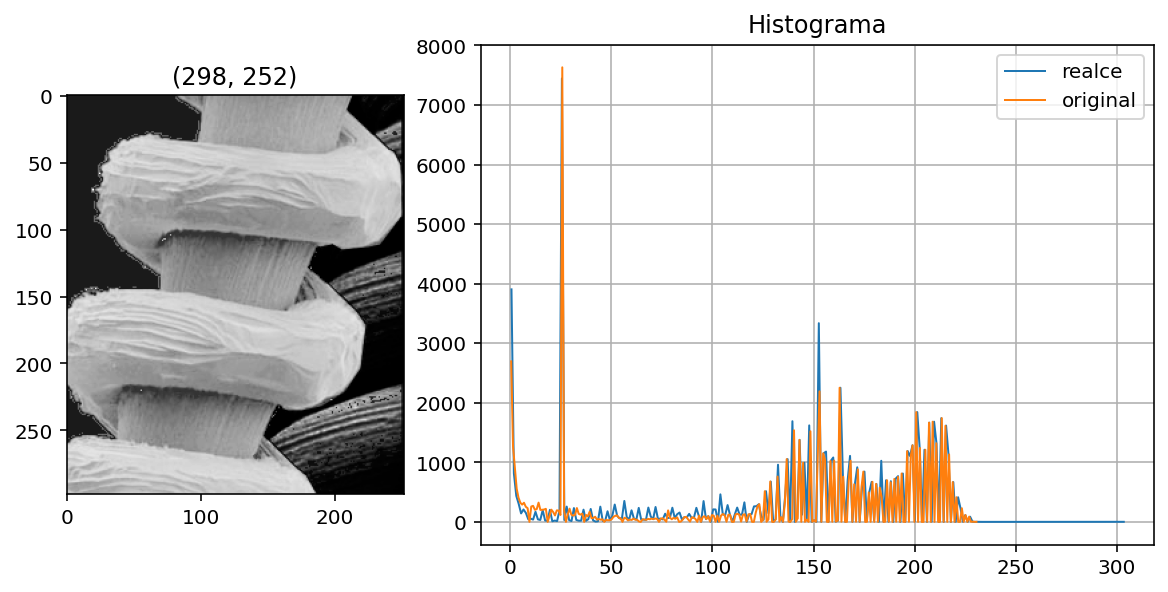

In [72]:
hist2, hist_centers2 = histogram(Out)# histograma da imagem. hist_centers são os centros dos bins.
#Para imagens do tioi int, cada tom de cinza é seu próprio bin.

fig, ax = plt.subplots(ncols=2, figsize=(8, 4),
                        gridspec_kw={'width_ratios':[1,2]},
                        constrained_layout=True); 
ax[0].imshow(Out, vmin=0, vmax=255, cmap='gray')
ax[0].set_title(Get.shape); 
#ax[0].axis('off')

ax[1].plot(hist_centers2, hist2,label='realce',linewidth=1)
ax[1].plot(hist_centers,hist,label='original',linewidth=1)
ax[1].grid()
ax[1].legend()
ax[1].set_title('Histograma'); 